# DATA VISUALIZATION

In [1]:
# import the libaraies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pt
from sklearn.impute import SimpleImputer 

In [2]:
# Load the dataset now
df=pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
# Remove or alter the null data in dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(df[['Rating']])
df['Rating']=imputer.transform(df[['Rating']])

In [6]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [7]:
df.isnull().sum().mean()

np.float64(1.0)

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
# Remove $ and convert to float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
df.rename(columns={'Price':'Price($)'}, inplace=True)

In [13]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price($)          float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
df.duplicated().sum()

np.int64(483)

In [15]:
df.drop_duplicates(inplace=True)

# UNIVARIATE VISUZALIZATION

<Axes: xlabel='Price($)'>

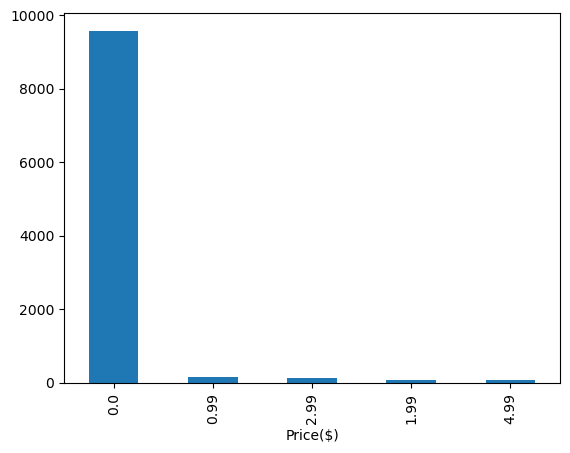

In [16]:
df['Price($)'].value_counts().head().plot(kind='bar')

<Axes: xlabel='Rating'>

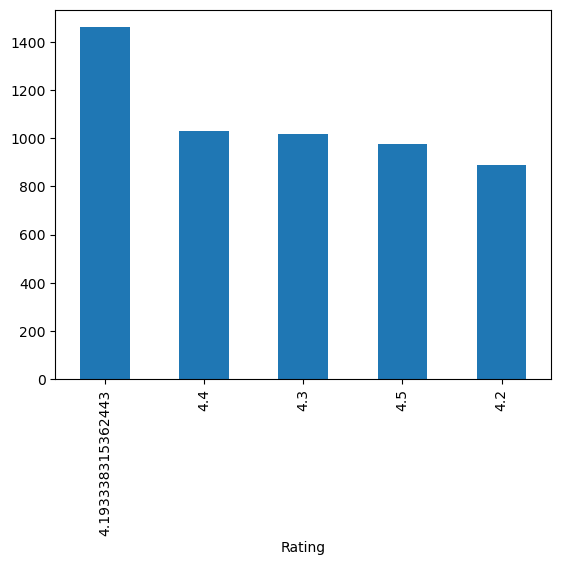

In [17]:
df['Rating'].value_counts().head().plot(kind='bar')

<Axes: ylabel='count'>

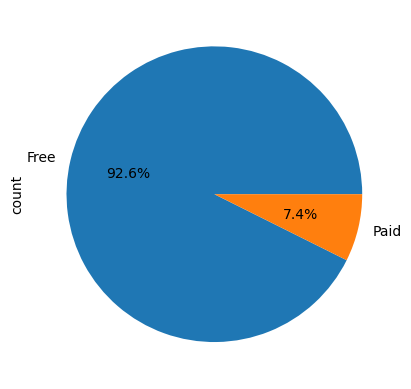

In [18]:
df['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

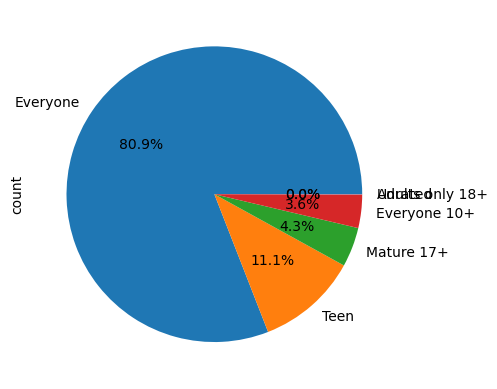

In [19]:
df['Content Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Category'>

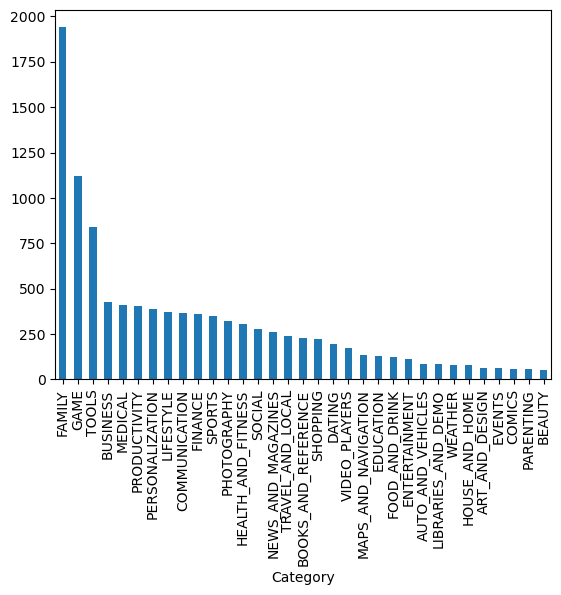

In [20]:
df['Category'].value_counts().plot(kind='bar')


<Axes: xlabel='Content Rating', ylabel='Price($)'>

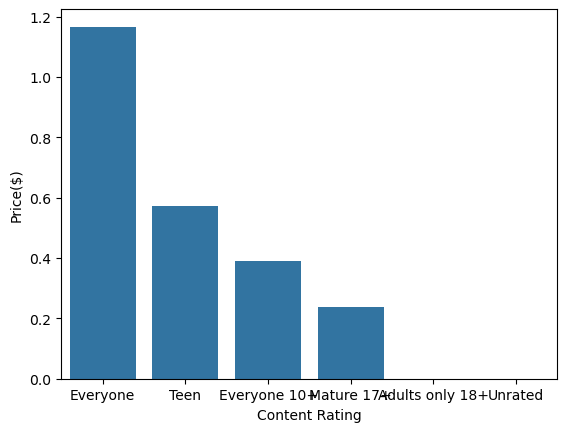

In [21]:
sn.barplot(data=df,x=df['Content Rating'],y=df['Price($)'],errorbar=None)

<Axes: xlabel='Price($)', ylabel='Category'>

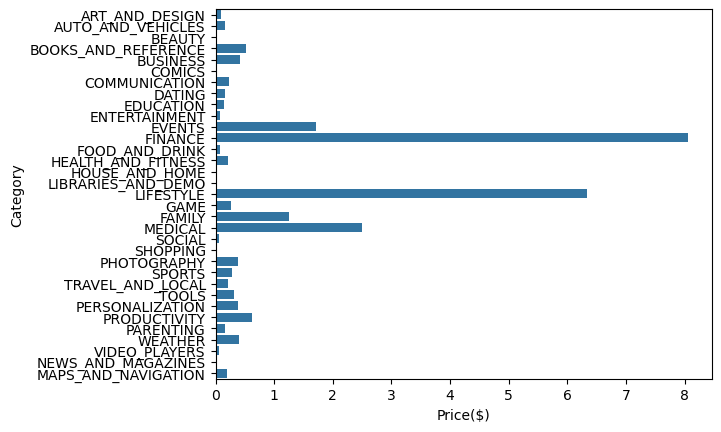

In [22]:
sn.barplot(data=df,x=df['Price($)'],y=df['Category'],errorbar=None)